<a href="https://colab.research.google.com/github/damianmtz98/PCD_MCD/blob/main/Practicas6_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Practica 6**

En nuestro proyecto buscamos predecir transacciones fraudulentas y por eso es necesario realizar esto con un modelo de clasificacion y buscaremos el mejor modelo que se adapte a nuestros datos.

Modelos de Clasificación:

El árbol de decisión es un modelo que puede entender tanto números como palabras. Es útil cuando los datos son diversos y tienen diferentes tipos de información. En nuestro proyecto, las transacciones financieras involucran diferentes tipos de datos (como montos de dinero y tipos de transacciones), y los árboles de decisión pueden manejar esta diversidad sin complicaciones, lo que simplifica el proceso de descubrir patrones en los datos.

La regresión logística es un modelo que trata de encontrar una línea recta para dividir dos grupos diferentes. Es bueno cuando los datos tienen una relación más simple y lineal. En nuestro proyecto, los datos pueden tener patrones más complejos y no lineales, y la regresión logística podría no capturarlos tan bien como otros modelos más flexibles.



# **Practica 7**

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
from sklearn.tree import export_text, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


In [20]:
df_fraud = pd.read_csv('Fraud111.csv')

In [21]:
sns.set(style="whitegrid")

In [25]:
#identificamos nuestra variable objetivo
features = df_fraud.drop(['FRAUD'], axis=1)
target = df_fraud['FRAUD']

In [24]:
#dividimos los datos en prueba y entrenamiento
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [26]:
#columnas categoricas
categorical_cols = ['TYPE', 'ID_ORIG', 'ID_DEST']

In [27]:
# transformamos las variables categorias a numericas
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'
)


In [28]:
# se aplica
X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

In [29]:
# se inicia el modelo de árbol de decisión
decision_tree_model = DecisionTreeClassifier(random_state=42)

In [30]:
# se entrena el modelo
decision_tree_model.fit(X_train_encoded, y_train)


DecisionTreeClassifier(random_state=42)

In [31]:
# se hace la prediccion en el conjunto de prueba
y_pred = decision_tree_model.predict(X_test_encoded)

In [32]:
#evaluamos el rendimiento
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

accuracy

0.9317641891757003

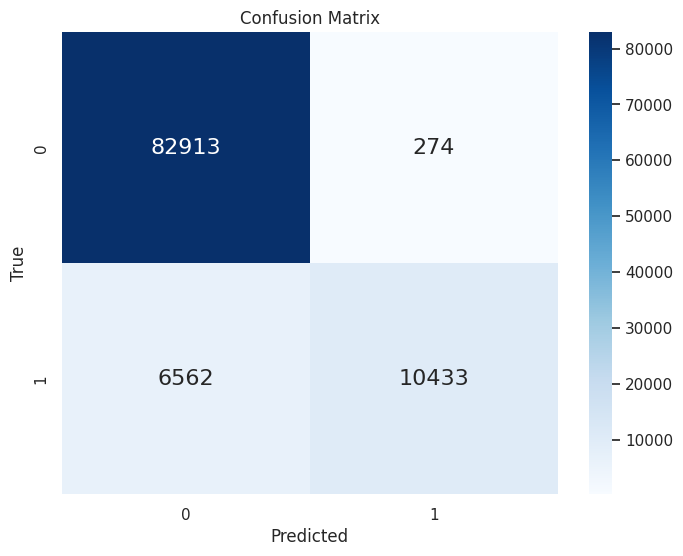

In [33]:
# matriz de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()



In [34]:
# resultados
print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.9317641891757003
Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     83187
           1       0.97      0.61      0.75     16995

    accuracy                           0.93    100182
   macro avg       0.95      0.81      0.86    100182
weighted avg       0.93      0.93      0.93    100182



In [35]:
from sklearn.metrics import roc_auc_score, roc_curve

In [36]:
# Calcular el ROC-AUC score
roc_auc = roc_auc_score(y_test, decision_tree_model.predict_proba(X_test_encoded)[:, 1])

In [37]:
# Calcular la curva ROC
fpr, tpr, _ = roc_curve(y_test, decision_tree_model.predict_proba(X_test_encoded)[:, 1])

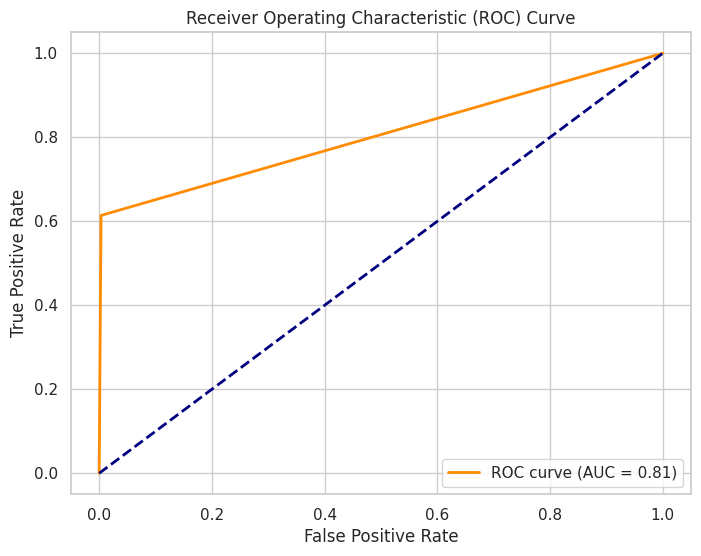

In [38]:
# Visualizar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [39]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, decision_tree_model.predict_proba(X_test_encoded)[:, 1])

# Calcular el AUC-ROC score
roc_auc = roc_auc_score(y_test, decision_tree_model.predict_proba(X_test_encoded)[:, 1])

# Mostrar los resultados
print("False Positive Rate (FPR):", fpr)
print("True Positive Rate (TPR):", tpr)
print("Thresholds:", thresholds)
print("AUC-ROC Score:", roc_auc)

False Positive Rate (FPR): [0.         0.00329378 1.        ]
True Positive Rate (TPR): [0.         0.61388644 1.        ]
Thresholds: [2. 1. 0.]
AUC-ROC Score: 0.8052963266514535


# **Resumen**

El modelo tiene una precisión general del 93.18%, lo que significa que acierta en la clasificación del 93.18% de todas las transacciones.

Para transacciones normales, el modelo tiene una precisión del 93% y un recall del 100%, indicando una fuerte capacidad para identificar transacciones no fraudulentas.

Para transacciones fraudulentas, la precisión es del 97%, lo que significa que el 97% de las transacciones clasificadas como fraudulentas son correctas.

TPR: Mejor capacidad para detectar transacciones fraudulentas.

FPR: Se mantiene relativamente bajo, lo que es positivo

AUC-ROC Score: Mide la capacidad de discriminación del modelo, se sitúa en 80.53%.
